In [1]:
import sys

In [2]:
sys.version_info

sys.version_info(major=3, minor=7, micro=3, releaselevel='final', serial=0)

In [3]:
if sys.platform == 'darwin' :
    print(" Mac OS")
else :
    print(" Windows ")

 Windows 


# 주요 설치 정보

    Mac이나 Windows에서 확인 

## 시각화 모듈 : matplotlib, seaborn

In [4]:

import matplotlib

print ('버전: ', matplotlib.__version__)
print ('설치위치: ', matplotlib.__file__)
print ('설정: ', matplotlib.get_configdir())
print ('캐시: ', matplotlib.get_cachedir())

버전:  3.0.3
설치위치:  C:\Users\dahlmoon\AppData\Roaming\Python\Python37\site-packages\matplotlib\__init__.py
설정:  C:\Users\dahlmoon\.matplotlib
캐시:  C:\Users\dahlmoon\.matplotlib


In [5]:
import seaborn

print ('버전: ', seaborn.__version__)
print ('설치위치: ',seaborn.__file__)

버전:  0.9.0
설치위치:  C:\Users\dahlmoon\Anaconda3\lib\site-packages\seaborn\__init__.py


### 그리드와 그래프 사이즈 지정

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = (14,4)

### 한글 폰트 전체 반영 

In [7]:
from matplotlib import font_manager, rc

if sys.platform == 'darwin' :
    rc('font', family='AppleGothic')

    plt.rcParams['axes.unicode_minus'] = False
else :
    
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)

### 시본에 있는 팁에 대한 데이터를 로드하기

       시본 내의 데이터를 로딩하면 pandas의 데이터프레임으로 처리함 

In [8]:
import seaborn as sns

In [9]:
tips = sns.load_dataset("tips")

In [10]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## 1. 히스토그램 그리기

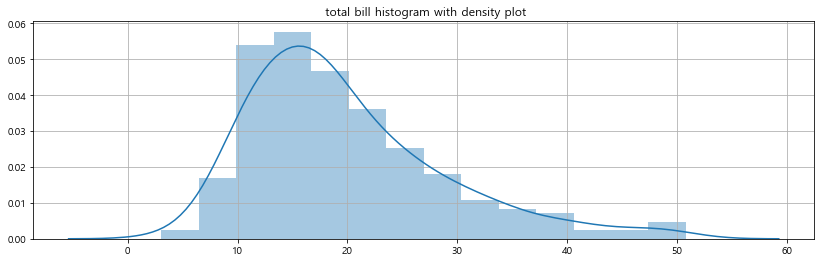

In [11]:
ax = sns.distplot(sorted(tips['total_bill']))

ax.set_title(" total bill histogram with density plot")
plt.show()

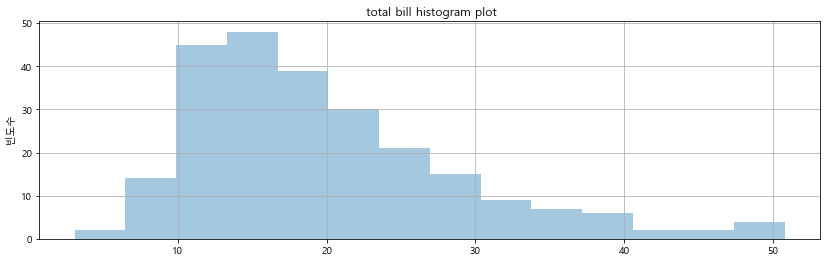

In [12]:
ax1 = sns.distplot(sorted(tips['total_bill']),kde=False)
ax1.set_title(" total bill histogram plot")
ax1.set_ylabel(" 빈도수 ")
plt.show()

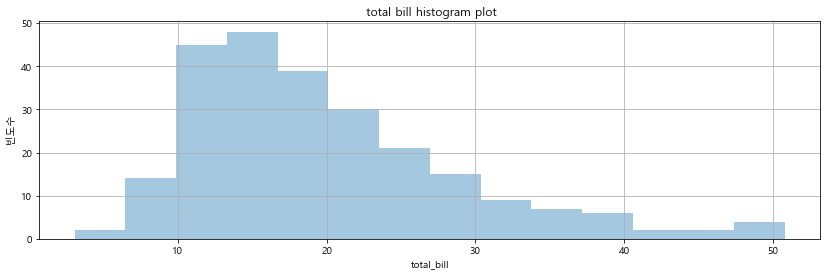

In [13]:
ax1 = sns.distplot(tips['total_bill'],kde=False)
ax1.set_title(" total bill histogram plot")
ax1.set_ylabel(" 빈도수 ")
plt.show()

### 밀집도 그래프만 처리

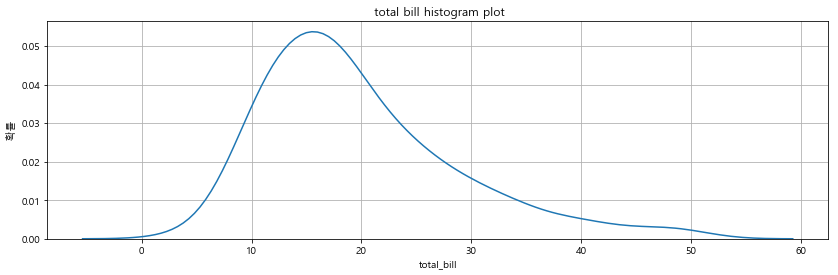

In [14]:
ax1 = sns.distplot(tips['total_bill'],hist=False)
ax1.set_title(" total bill histogram plot")
ax1.set_ylabel(" 확률 ")
plt.show()

### 밀집도를 추가해서 알아보기 : rug

     아래 부분에 그래프에 대한 밀집도가 추가됨 

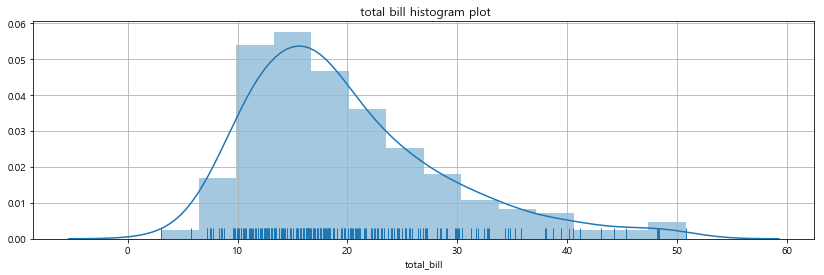

In [15]:
ax1 = sns.distplot(tips['total_bill'],rug=True)
ax1.set_title(" total bill histogram plot")

plt.show()

### 이산 값을 처리하는 그래프

In [16]:
tips.day.value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

#### x 축 값이 자동으로 세팅됨

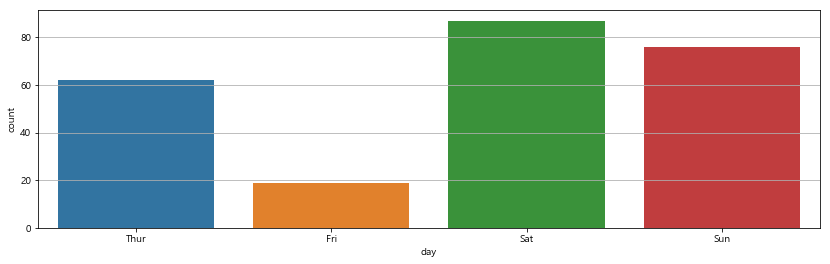

In [17]:
ax3 = sns.countplot('day', data=tips)


## 2.  박스 그래프

###  박스그래프 하나만 그리기 

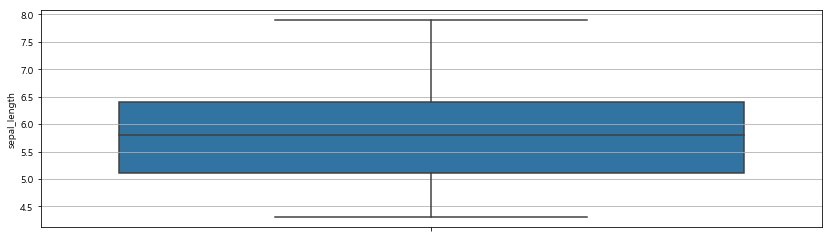

In [18]:

df = sns.load_dataset('iris')
 
# Make boxplot for one group only
sns.boxplot( y=df["sepal_length"] )
#sns.plt.show()


### 두 개의 박스 그래프

Text(0.5, 1.0, ' 점심과 저녁 금액 차이 ')

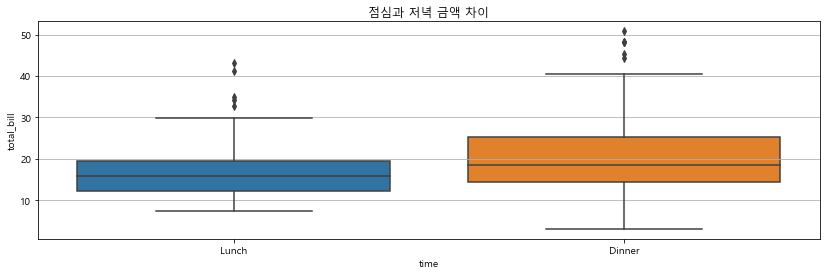

In [19]:
ax4 = sns.boxplot(x='time', y='total_bill', data=tips)
ax4.set_title(" 점심과 저녁 금액 차이 ")

Text(0.5, 1.0, ' 세개의 박스그래프 그리기 ')

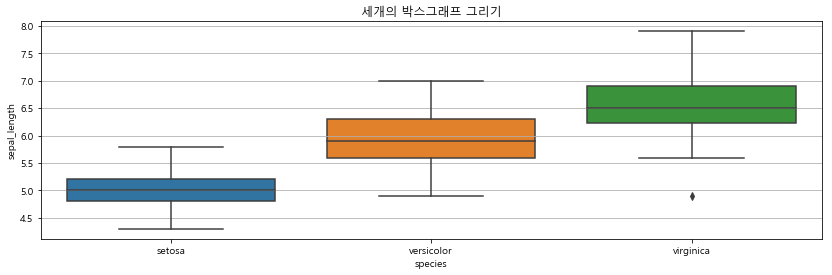

In [33]:
ax5 = sns.boxplot( x=df["species"], y=df["sepal_length"] )
ax5.set_title(" 세개의 박스그래프 그리기 ")

## 3.  바그래프(평균 표시)

## barplot

Text(0.5, 1.0, ' 평균을 계산해서 그래프에 표시')

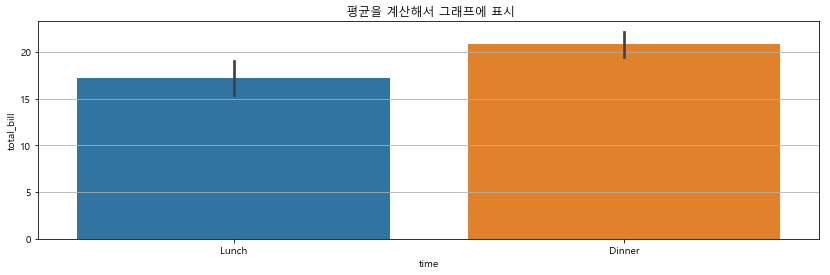

In [20]:
ax5 = sns.barplot(x='time', y='total_bill', data=tips)
ax5.set_title(" 평균을 계산해서 그래프에 표시")

## Grouped barplots : carplot

      범주에 따라 bar 그래프를 그릴 수 있다.


In [38]:
titanic = sns.load_dataset("titanic")

In [39]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


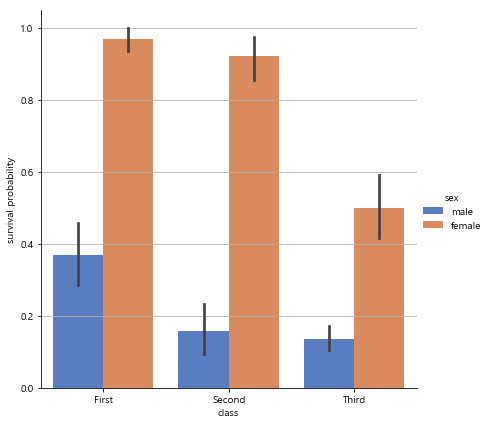

In [37]:
# Draw a nested barplot to show survival for class and sex
g = sns.catplot(x="class", y="survived", hue="sex", data=titanic,
                height=6, kind="bar", palette="muted")
g.set_ylabels("survival probability")

## 4. 바이올린 그래프

    커널밀도를 표시한 막대그래프

Text(0.5, 1.0, ' 바이올린 그래프에 표시')

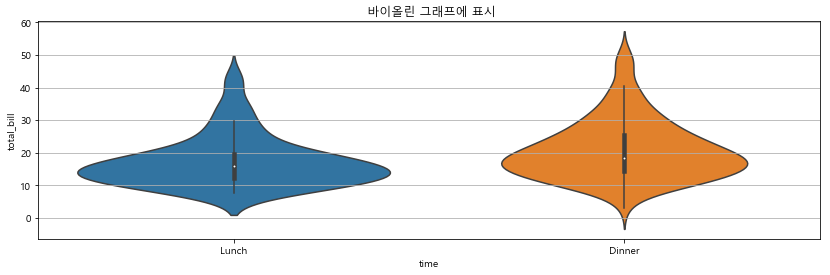

In [21]:
ax6 = sns.violinplot(x='time', y='total_bill', data=tips)
ax6.set_title(" 바이올린 그래프에 표시")

## 5. 회귀분석 그래프 regplot

     축에는 데이터에 들어갈 열 이름, data에는 데이터프레임

In [22]:
help(sns.regplot)

Help on function regplot in module seaborn.regression:

regplot(x, y, data=None, x_estimator=None, x_bins=None, x_ci='ci', scatter=True, fit_reg=True, ci=95, n_boot=1000, units=None, order=1, logistic=False, lowess=False, robust=False, logx=False, x_partial=None, y_partial=None, truncate=False, dropna=True, x_jitter=None, y_jitter=None, label=None, color=None, marker='o', scatter_kws=None, line_kws=None, ax=None)
    Plot data and a linear regression model fit.
    
    There are a number of mutually exclusive options for estimating the
    regression model. See the :ref:`tutorial <regression_tutorial>` for more
    information.    
    
    Parameters
    ----------
    x, y: string, series, or vector array
        Input variables. If strings, these should correspond with column names
        in ``data``. When pandas objects are used, axes will be labeled with
        the series name.
    data : DataFrame
        Tidy ("long-form") dataframe where each column is a variable and each
  

Text(0, 0.5, 'Tip')

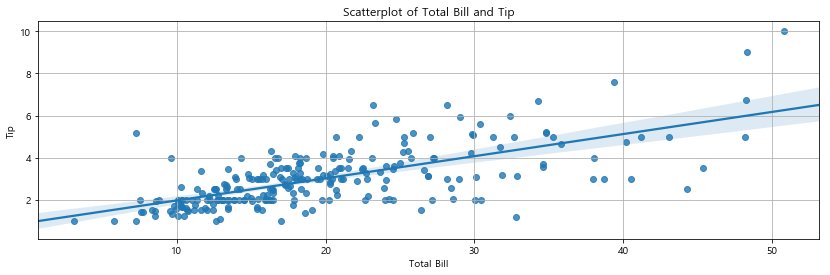

In [23]:
ax = plt.subplots() 
ax = sns.regplot(x='total_bill', y='tip', data=tips) 
ax.set_title('Scatterplot of Total Bill and Tip') 
ax.set_xlabel('Total Bill') 
ax.set_ylabel('Tip') 

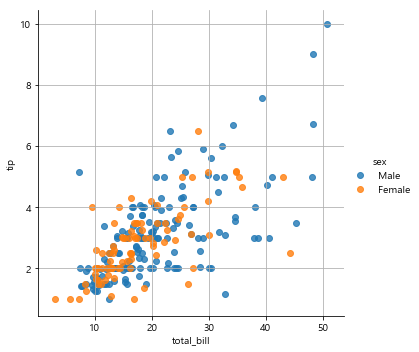

In [28]:
scatter = sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex', fit_reg=False) 
plt.show()

## 6. 여러 그래프를 조인해서 보기 

In [24]:
help(sns.jointplot)

Help on function jointplot in module seaborn.axisgrid:

jointplot(x, y, data=None, kind='scatter', stat_func=None, color=None, height=6, ratio=5, space=0.2, dropna=True, xlim=None, ylim=None, joint_kws=None, marginal_kws=None, annot_kws=None, **kwargs)
    Draw a plot of two variables with bivariate and univariate graphs.
    
    This function provides a convenient interface to the :class:`JointGrid`
    class, with several canned plot kinds. This is intended to be a fairly
    lightweight wrapper; if you need more flexibility, you should use
    :class:`JointGrid` directly.
    
    Parameters
    ----------
    x, y : strings or vectors
        Data or names of variables in ``data``.
    data : DataFrame, optional
        DataFrame when ``x`` and ``y`` are variable names.
    kind : { "scatter" | "reg" | "resid" | "kde" | "hex" }, optional
        Kind of plot to draw.
    stat_func : callable or None, optional
        *Deprecated*
    color : matplotlib color, optional
        Colo

In [25]:
iris = sns.load_dataset("iris")

## Joinplot

Text(0.5, 1.03, 'Joint Plot of iris')

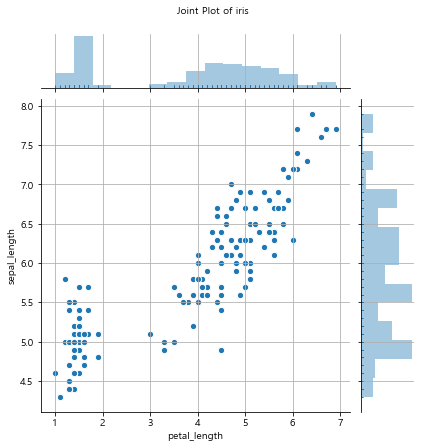

In [26]:

joint = sns.jointplot("petal_length", "sepal_length", data=iris,
                          marginal_kws=dict(bins=15, rug=True),
                       annot_kws=dict(stat="r"),
                        s=40, edgecolor="w", linewidth=1)

joint.set_axis_labels(xlabel='petal_length', ylabel="sepal_length")
joint.fig.suptitle('Joint Plot of iris', fontsize=10, y=1.03)

##  7. 관계 그래프 그리기

### 데이터프레임 데이터를 가지고 여러 그래프를 그린다

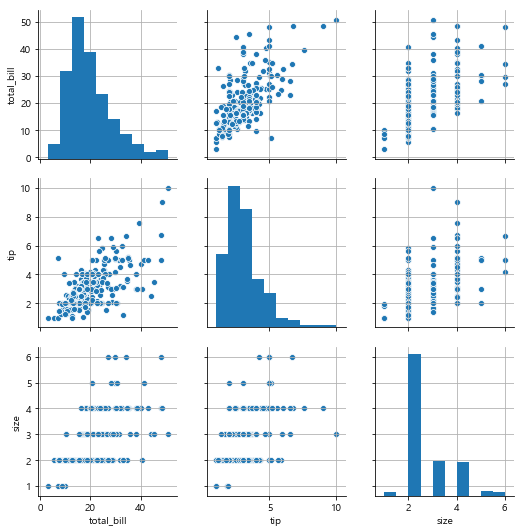

In [27]:
sns.pairplot(tips)

## 특정 분류를 기준으로 그래프 그리기

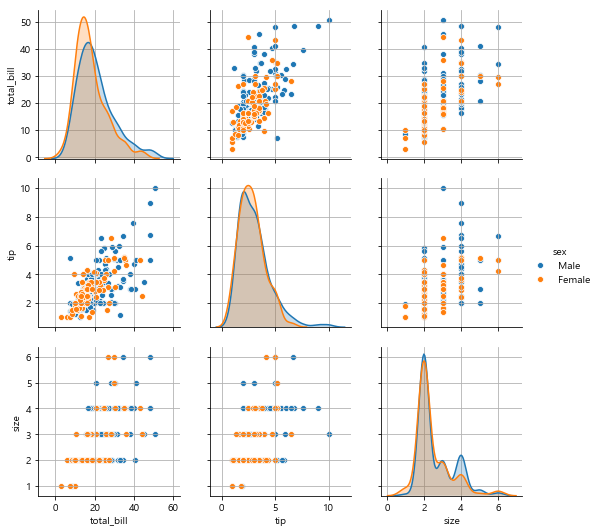

In [30]:
fig = sns.pairplot(tips, hue='sex')